<a href="https://colab.research.google.com/github/rishabh23-byte/hello_code/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [ ]:
# printing the 10th image

print(X_train[10])

In [ ]:
print(X_train[10].shape)

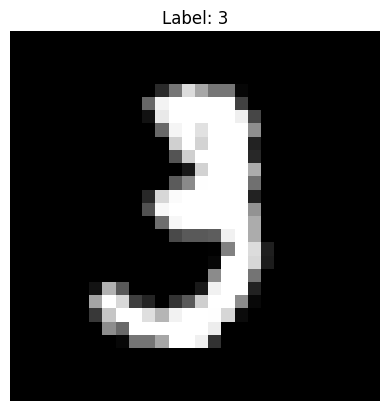

In [6]:
# import matplotlib.pyplot as plt

# plt.imshow(X_train[10], cmap='gray')
# plt.title(f'Label: {Y_train[10]}')  # Displays the corresponding label
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()


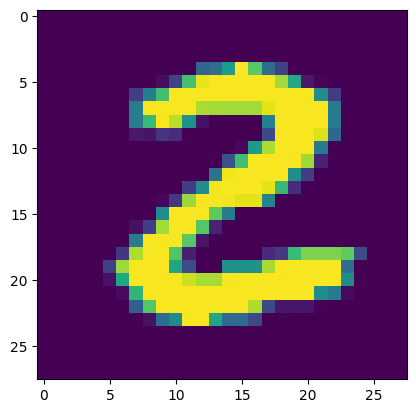

2


In [7]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [ ]:
print(Y_train.shape, Y_test.shape)

In [8]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

In [10]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7229 - loss: 4.4564
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8941 - loss: 0.4237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9133 - loss: 0.3426
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9238 - loss: 0.2890
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.2564
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9386 - loss: 0.2309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9446 - loss: 0.2085
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9478 - loss: 0.1847
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9525 - loss: 0.1736
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9529 - loss: 0.1652


In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9361 - loss: 0.2323
0.9455999732017517


In [16]:
print(X_test.shape)

(10000, 28, 28)


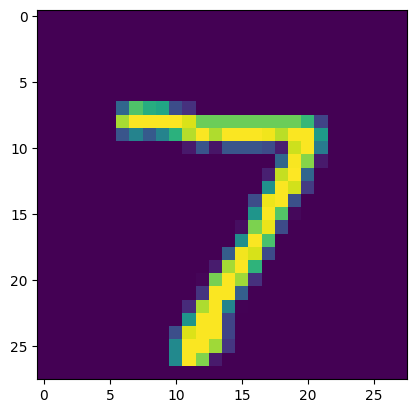

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[0.03338928 0.9999641  0.999954   0.99979097 0.98665565 0.9978556
 0.79495656 1.         0.9966583  0.99998593]


In [22]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 9, 6, 6, 3, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 2, 1, 3, 1, 1, 7, 4, 2, 3, 3, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 0, 7, 8, 9, 3, 1, 4, 6, 4, 3, 0, 7, 0, 3, 9, 1, 2, 3, 2, 9, 1, 7, 6, 2, 7, 8, 4, 1, 3, 0, 1, 3, 6, 4, 3, 1, 4, 1, 1, 6, 9, 6, 0, 3, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 1, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 3, 8, 3, 6, 6, 3, 2, 8, 1, 0, 1, 6, 4, 6, 2, 3, 1, 1, 1, 8, 2, 0, 4, 9, 8, 3, 5, 1, 3, 6, 0, 3, 7, 4, 6, 3, 4, 6, 3, 4, 5, 1, 4, 4, 3, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 0, 1, 1, 1, 3, 9, 3, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 1, 3, 7, 2, 2, 1, 1, 2, 8, 4, 1, 3, 3, 3, 8, 9, 3, 9, 2, 2, 4, 1, 3, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 3, 2, 3, 2, 8, 2, 0, 8, 3, 1, 1, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 2, 3, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 2, 1, 7, 4, 0, 2, 1, 4, 3, 3, 0, 0, 3, 1, 9, 6, 0, 2, 3, 9, 7, 9, 3, 0, 4, 2, 0, 2, 1, 1, 2, 1, 

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 959    1    1    0    6    2    5    1    3    2]
 [   2 1112    3    2    0    1    2    5    8    0]
 [   6    6  948   33    9    3    2    8   16    1]
 [   2    9   22  944    4    5    0    2   17    5]
 [  55    2    3    0  877    0   12    4    3   26]
 [  97   11    6  584   10  154    8    1   14    7]
 [  79    2    2    0    5   31  830    0    9    0]
 [   1  319   99   95    3    1    1  487    5   17]
 [   8    0    7   14    9    7    3    5  912    9]
 [   8    4    1    9   44   11    1    6    9  916]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

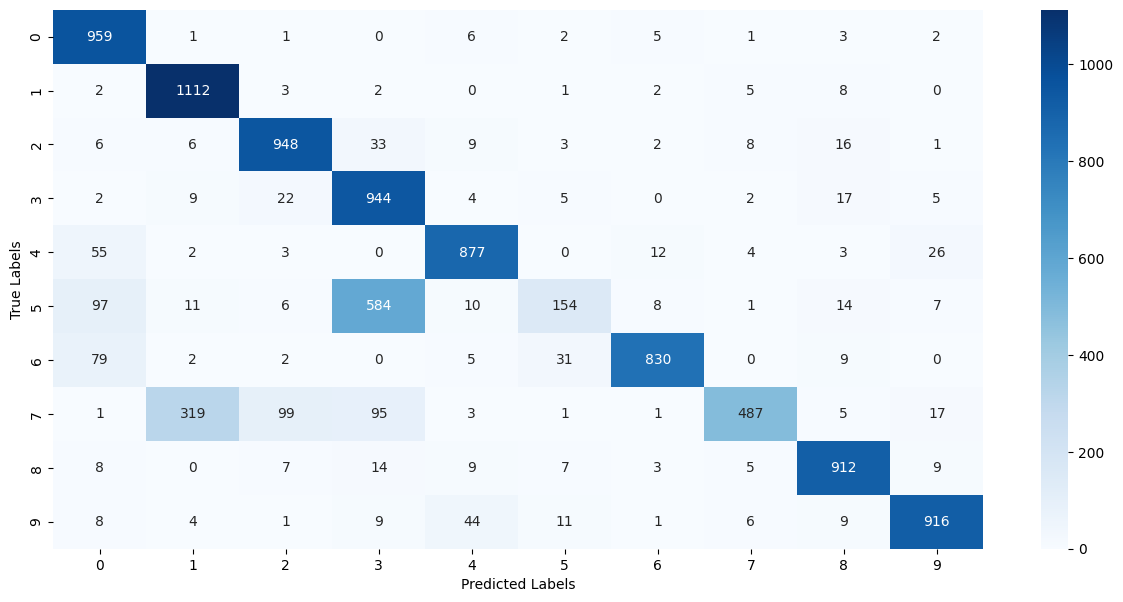

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [27]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

NoneType

In [29]:
print(input_image)

None


In [30]:
cv2_imshow(input_image)

AttributeError: 'NoneType' object has no attribute 'clip'

In [31]:
input_image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

In [32]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

KeyboardInterrupt: Interrupted by user